## Load and Explore the Datasets

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os

### Load the Datasets

In [2]:
# Load the analyst ratings dataset
analyst_ratings = pd.read_csv('../data/raw_analyst_ratings.csv')

# Load historical stock data
aapl_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
amzn_data = pd.read_csv('../data/yfinance_data/AMZN_historical_data.csv')
goog_data = pd.read_csv('../data/yfinance_data/GOOG_historical_data.csv')
meta_data = pd.read_csv('../data/yfinance_data/META_historical_data.csv')
msft_data = pd.read_csv('../data/yfinance_data/MSFT_historical_data.csv')
nvda_data = pd.read_csv('../data/yfinance_data/NVDA_historical_data.csv')
tsla_data = pd.read_csv('../data/yfinance_data/TSLA_historical_data.csv')


### Initial Data Inspection

In [3]:
analyst_ratings.shape

(1407328, 6)

In [4]:
analyst_ratings.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [5]:
analyst_ratings.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
analyst_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [7]:
analyst_ratings.date.describe()

count                 1407328
unique                  39957
top       2020-03-12 00:00:00
freq                     1766
Name: date, dtype: object

In [8]:
print("Analyst Ratings Data:")
print(analyst_ratings.head())

print("\nAAPL Historical Data:")
print(aapl_data.head())

Analyst Ratings Data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020

## Descriptive Statistics and Analysis

### Basic Statistics for Textual Lengths (Analyst Ratings)

In [9]:
analyst_ratings['headline_length'] = analyst_ratings['headline'].apply(len)
print(analyst_ratings['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [10]:
analyst_ratings.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87


### Count Articles Per Publisher:

In [11]:
publisher_count = analyst_ratings['publisher'].value_counts()
print(publisher_count)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


### Analyze Publication Dates

In [12]:
print(analyst_ratings['date'].head(100))

0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
                ...            
95          2019-10-09 00:00:00
96          2019-10-08 00:00:00
97          2019-10-02 00:00:00
98          2019-09-05 00:00:00
99          2019-09-03 00:00:00
Name: date, Length: 100, dtype: object


In [13]:
analyst_ratings['date'] = pd.to_datetime(analyst_ratings['date'], format='ISO8601', utc=True)

In [14]:
publication_trends = analyst_ratings['date'].value_counts().sort_index()
print(publication_trends.head())

date
2009-02-14 04:00:00+00:00    1
2009-04-27 04:00:00+00:00    2
2009-04-29 04:00:00+00:00    1
2009-05-22 04:00:00+00:00    1
2009-05-27 04:00:00+00:00    6
Name: count, dtype: int64


#### Visualize Publication Trends

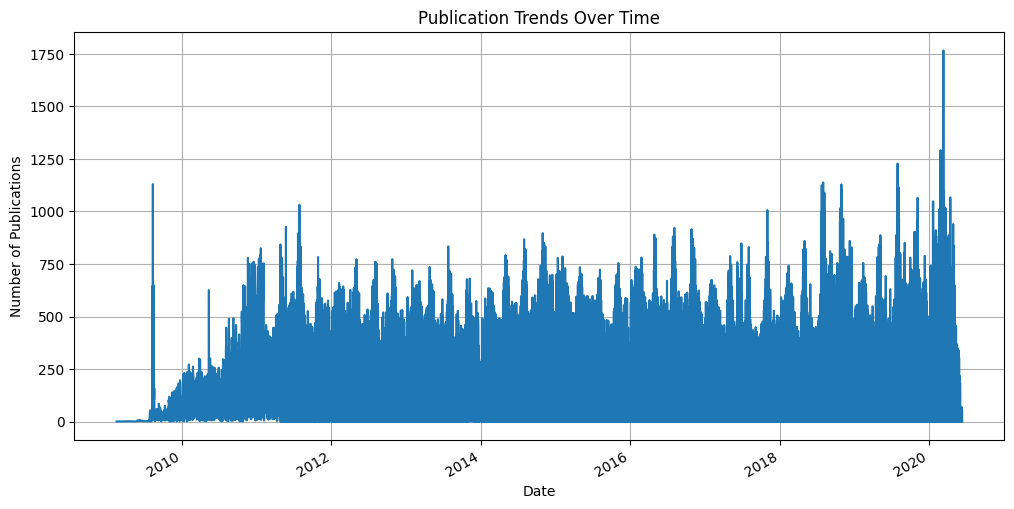

In [15]:
# Plot publication trends
plt.figure(figsize=(12, 6))
publication_trends.plot()
plt.title('Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()


## Sentiment Analysis & Topic Modeling

### Sentiment Analysis

In [16]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

analyst_ratings['sentiment'] = analyst_ratings['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
print(analyst_ratings[['headline', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/olani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday      0.000
1         Stocks That Hit 52-Week Highs On Wednesday      0.000
2                      71 Biggest Movers From Friday      0.000
3       46 Stocks Moving In Friday's Mid-Day Session      0.000
4  B of A Securities Maintains Neutral on Agilent...      0.296


In [17]:
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
# Apply classification
analyst_ratings['sentiment_class'] = analyst_ratings['sentiment'].apply(classify_sentiment)

# Display the first few rows
print(analyst_ratings[['headline', 'sentiment', 'sentiment_class']].head())

                                            headline  sentiment  \
0            Stocks That Hit 52-Week Highs On Friday      0.000   
1         Stocks That Hit 52-Week Highs On Wednesday      0.000   
2                      71 Biggest Movers From Friday      0.000   
3       46 Stocks Moving In Friday's Mid-Day Session      0.000   
4  B of A Securities Maintains Neutral on Agilent...      0.296   

  sentiment_class  
0         neutral  
1         neutral  
2         neutral  
3         neutral  
4        positive  


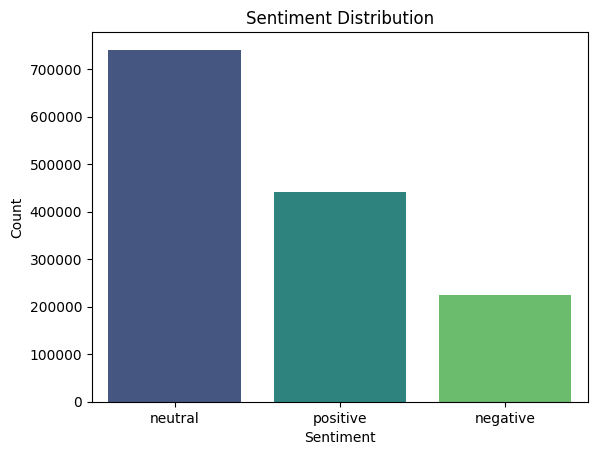

In [18]:
sns.countplot(x='sentiment_class', data=analyst_ratings, hue='sentiment_class', palette='viridis', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


### Topic Modeling

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(analyst_ratings['headline'])
common_keywords = vectorizer.get_feature_names_out()
print("Common Keywords:", common_keywords)

Common Keywords: ['earnings' 'eps' 'est' 'market' 'reports' 'sales' 'shares' 'stocks'
 'update' 'vs']


In [20]:
# Sum up the occurrences of each keyword
keyword_frequencies = np.array(X.sum(axis=0)).flatten()

# Create a DataFrame for visualization
keywords_df = pd.DataFrame({'Keyword': common_keywords, 'Frequency': keyword_frequencies})

# Sort by frequency for better visualization
keywords_df = keywords_df.sort_values(by='Frequency', ascending=False)

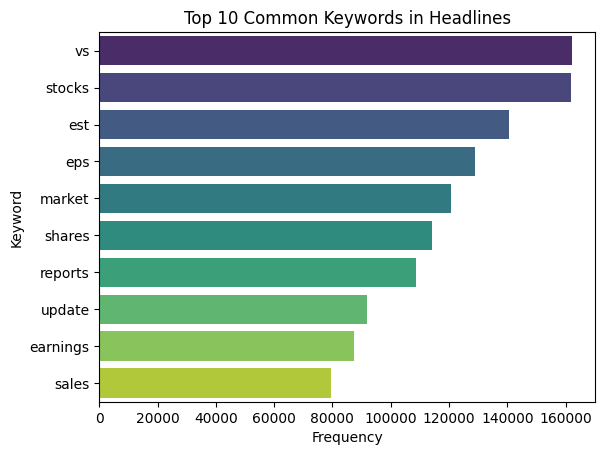

In [21]:
sns.barplot(x='Frequency', y='Keyword', hue='Keyword', data=keywords_df, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Common Keywords in Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

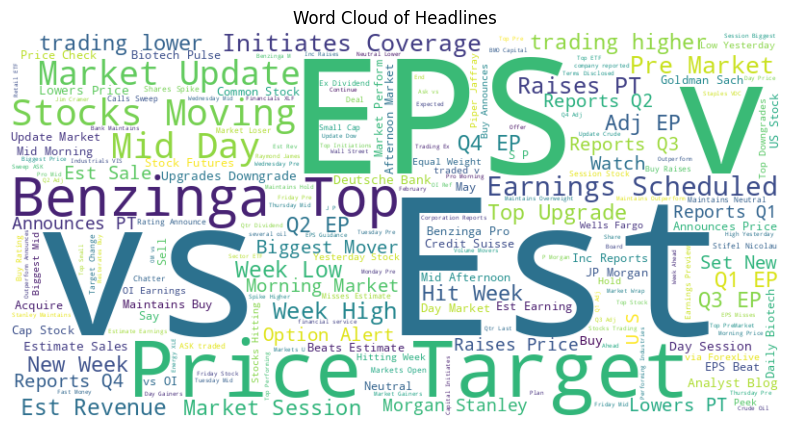

In [22]:
from wordcloud import WordCloud, STOPWORDS

# Combine all headlines into a single string
text = ' '.join(analyst_ratings['headline'])

# Create a set of stopwords
custom_stopwords = set(STOPWORDS)

# Add any additional stopwords if needed
additional_stopwords = {'said', 'will', 'year', 'report'}  # Example stopwords
custom_stopwords.update(additional_stopwords)

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,  # Use custom stopwords list
    colormap='viridis'
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Headlines')
plt.show()

## Time Series Analysis (Stock Data)

### Examine Stock Data

In [23]:
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])
aapl_data.set_index('Date', inplace=True)

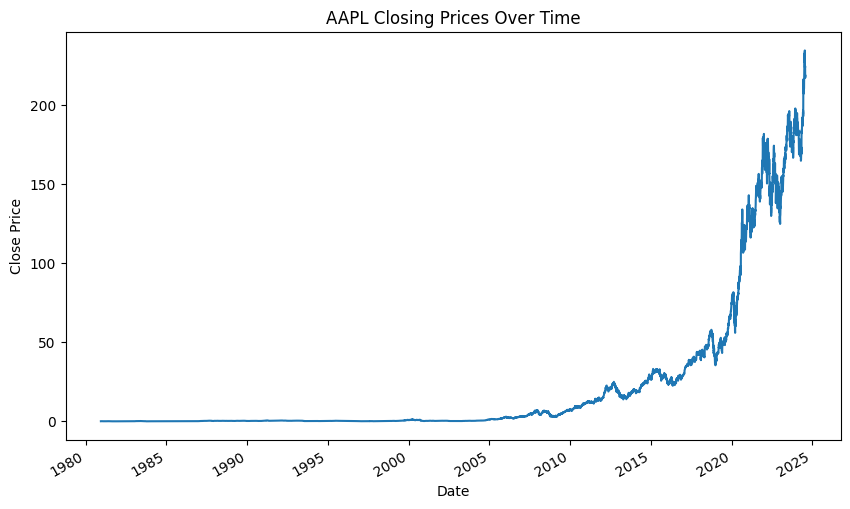

In [24]:
plt.figure(figsize=(10, 6))
aapl_data['Close'].plot()
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

## Publisher Analysis

### Top Publishers

In [25]:
top_publishers = analyst_ratings['publisher'].value_counts().head(10)
print(top_publishers)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


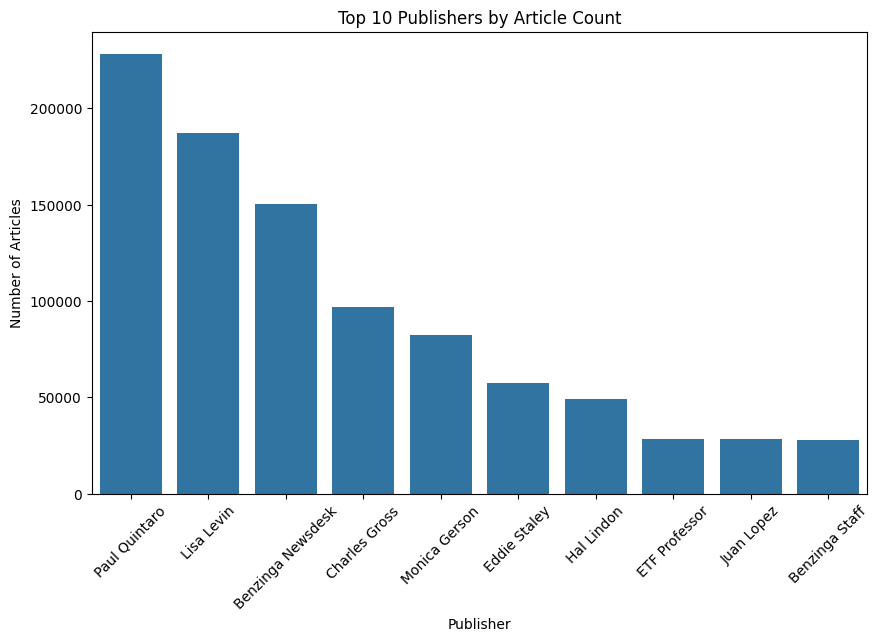

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()